# ASG3 Ian Feekes

This notebook contains all materials for assignment 3 USD MSAAI Image Procesing submission by Ian Feekes (ifeekes@sandiego.edu 916-333-9381). 

If the materials here do not meet the criteria, or find their way into the correct place, please contact me an I will gratefully and expediently make the corrections. 

## Part 1

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pylab as plt
import numpy as np
import cv2
import pandas as pd

In [2]:
#a) Load the oxford_iiit_pet dataset
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteTIBXJ9/oxford_iiit_pet-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteTIBXJ9/oxford_iiit_pet-test.tfrecord*...:   0%…

Dataset oxford_iiit_pet downloaded and prepared to ~/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [3]:
def read_and_preprocess(data):
  input_image = tf.image.resize(data['image'], (128, 128))  #Resize the data['image'] to 128x128
  input_mask = tf.image.resize(data['segmentation_mask'], (128, 128)) #Resize the data['segmentation_mask'] to 128x128
  
  input_image = tf.image.convert_image_dtype(input_image, tf.float32) # [0,1]
  input_mask -= 1 # {1,2,3} to {0,1,2}
  return input_image, input_mask

In [4]:
train = dataset['train'].map(read_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test = dataset['test'].map(read_and_preprocess)

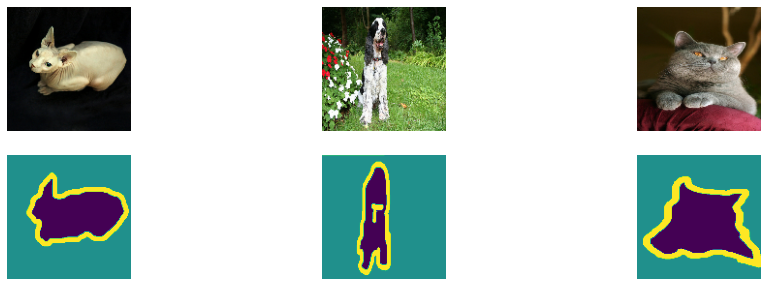

In [5]:
# b) Create the segmentation mask
# Show some images from dataset and their segmented version

f, ax = plt.subplots(2, 3, figsize=(16,5))

for idx, (img, mask) in enumerate(train.take(3)):
  ax[0, idx].imshow(tf.keras.preprocessing.image.array_to_img(img))
  ax[0, idx].axis('off')
  mask = tf.reshape(mask, [128, 128])
  ax[1, idx].imshow(mask.numpy())
  ax[1, idx].axis('off')

## Part 2- Annotation

In [6]:
!git clone https://github.com/matterport/Mask_RCNN.git
!pip install -r 'Mask_RCNN/requirements.txt'
!cd Mask_RCNN ; python setup.py install

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 137.67 MiB | 15.75 MiB/s, done.
Resolving deltas: 100% (558/558), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 14.6 MB/s 
     |████████████████████████████████| 298 kB 76.7 MB/s 
     |████████████████████████████████| 154 kB 72.6 MB/s 
     |████████████████████████████████| 121 kB 77.5 MB/s 
     |████████████████████████████████| 83 kB 2.4 MB/s 
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be 

In [7]:
!git clone https://github.com/matterport/Mask_RCNN.git
%cd Mask_RCNN/
!python setup.py install
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.
/content/Mask_RCNN
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-

In [8]:
%cd /content/

/content


In [9]:
# Get data from here https://github.com/experiencor/raccoon_dataset
!git clone https://github.com/experiencor/raccoon_dataset

Cloning into 'raccoon_dataset'...
remote: Enumerating objects: 646, done.
remote: Total 646 (delta 0), reused 0 (delta 0), pack-reused 646
Receiving objects: 100% (646/646), 48.00 MiB | 21.57 MiB/s, done.
Resolving deltas: 100% (412/412), done.


In [10]:
%cd /content/raccoon_dataset/data

/content/raccoon_dataset/data


In [11]:
full_labels = pd.read_csv('raccoon_labels.csv')
full_labels

,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-1.jpg,650,417,raccoon,81,88,522,408
1,raccoon-10.jpg,450,495,raccoon,130,2,446,488
2,raccoon-100.jpg,960,576,raccoon,548,10,954,520
3,raccoon-101.jpg,640,426,raccoon,86,53,400,356
4,raccoon-102.jpg,259,194,raccoon,1,1,118,152
...,...,...,...,...,...,...,...,...
212,raccoon-95.jpg,320,400,raccoon,50,45,272,289
213,raccoon-96.jpg,230,219,raccoon,28,25,203,175
214,raccoon-97.jpg,500,393,raccoon,1,32,343,307
215,raccoon-98.jpg,480,360,raccoon,108,31,351,308


In [12]:
%cd /content/Mask_RCNN

/content/Mask_RCNN


In [13]:
from mrcnn import utils

In [14]:
%cd /content

/content


In [15]:
def draw_boxes(image_name):
    selected_value = full_labels[full_labels.filename == image_name]
    img = cv2.imread('{}'.format(image_name))
    for index, row in selected_value.iterrows():
        print(index, row)
        print(row['xmin'], row['ymin'])
        img = cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0, 255, 0), 3)
    return img

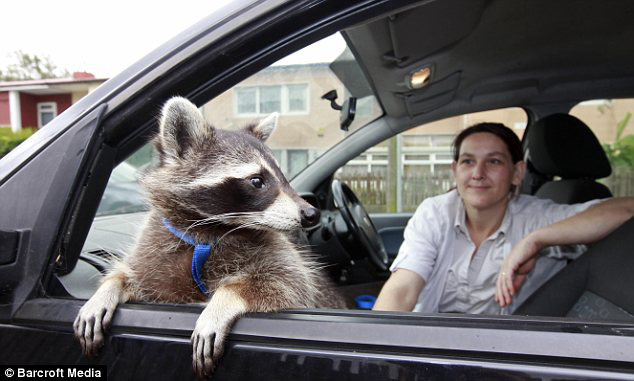

In [16]:
from PIL import Image

raccoon_path = 'raccoon_dataset/images/'

# Look into data
# Plot some samples here
imageName = raccoon_path + full_labels.sample()['filename'].values[0]

Image.open(imageName)

In [17]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
 
# class that defines and loads the raccoon dataset
class RaccoonDataset(Dataset):
	# load the dataset definitions
	def load_dataset(self, dataset_dir, is_train=True):
		# define one class
		self.add_class("raccoon_dataset", 1, "raccoon")
		# define data locations
		images_dir = dataset_dir + '/images/'
		annotations_dir = dataset_dir + '/annotations/raccoon-'
		# find all images
		for filename in listdir(images_dir):
			# extract image id
			image_id = filename[8:-4]
			# skip bad images
			if image_id in ['00090']:
				continue
			# skip all images after 150 if we are building the train set
			if is_train and int(image_id) >= 150:
				continue
			# skip all images before 150 if we are building the test/val set
			if not is_train and int(image_id) < 150:
				continue
			img_path = images_dir + filename
			ann_path = annotations_dir + image_id + '.xml'
			# add to dataset
			self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
 
	# extract bounding boxes from an annotation file
	def extract_boxes(self, filename):
		# load and parse the file
		tree = ElementTree.parse(filename)
		# get the root of the document
		root = tree.getroot()
		# extract each bounding box
		boxes = list()
		for box in root.findall('.//bndbox'):
			xmin = int(box.find('xmin').text)
			ymin = int(box.find('ymin').text)
			xmax = int(box.find('xmax').text)
			ymax = int(box.find('ymax').text)
			coors = [xmin, ymin, xmax, ymax]
			boxes.append(coors)
		# extract image dimensions
		width = int(root.find('.//size/width').text)
		height = int(root.find('.//size/height').text)
		return boxes, width, height
 
	# load the masks for an image
	def load_mask(self, image_id):
		# get details of image
		info = self.image_info[image_id]
		# define box file location
		path = info['annotation']
		# load XML
		#path = '/content/raccoon_dataset/annotations/raccoon-'+image_id   #Added by me
		boxes, w, h = self.extract_boxes(path)
		# create one array for all masks, each on a different channel
		masks = zeros([h, w, len(boxes)], dtype='uint8')
		# create masks
		class_ids = list()
		for i in range(len(boxes)):
			box = boxes[i]
			row_s, row_e = box[1], box[3]
			col_s, col_e = box[0], box[2]
			masks[row_s:row_e, col_s:col_e, i] = 1
			class_ids.append(self.class_names.index('raccoon'))
		return masks, asarray(class_ids, dtype='int32')
 
	# load an image reference
	def image_reference(self, image_id):
		info = self.image_info[image_id]
		return info['path']
 
# train set
train_set = RaccoonDataset()
train_set.load_dataset('raccoon_dataset', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
 
# test/val set
test_set = RaccoonDataset()
test_set.load_dataset('raccoon_dataset', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 149
Test: 51


In [18]:
# load an image
train_set.image_reference(0)

# Use the function above to create the image and its mask
train_set.load_mask(0)
train_set.extract_boxes('raccoon_dataset/annotations/raccoon-1.xml')

([[81, 88, 522, 408]], 650, 417)

**Part 3- YOLO 5**




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


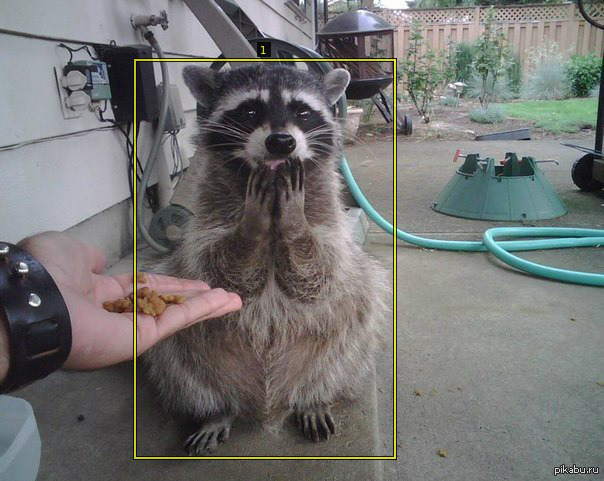

In [35]:
# a- Create annotation
# You can upload the file using ![title](filename.jpeg)
# import image module
from google.colab import drive
drive.mount('/content/drive')

Image.open("/content/drive/MyDrive/Colab Notebooks/Image_Processing/ASG3/raykin_pre_annotation.png")

In [20]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
! pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15053, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 15053 (delta 58), reused 77 (delta 50), pack-reused 14960
Receiving objects: 100% (15053/15053), 13.70 MiB | 15.35 MiB/s, done.
Resolving deltas: 100% (10396/10396), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
#b- Download required tools
# Clone yolo 5 and check all dependencies
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-243-g5e03f5f Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 17.7MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 17.1ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 13.4ms
Speed: 0.5ms pre-process, 15.2ms inference, 18.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


YOLOv5 🚀 v6.2-243-g5e03f5f Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.5/78.2 GB disk)


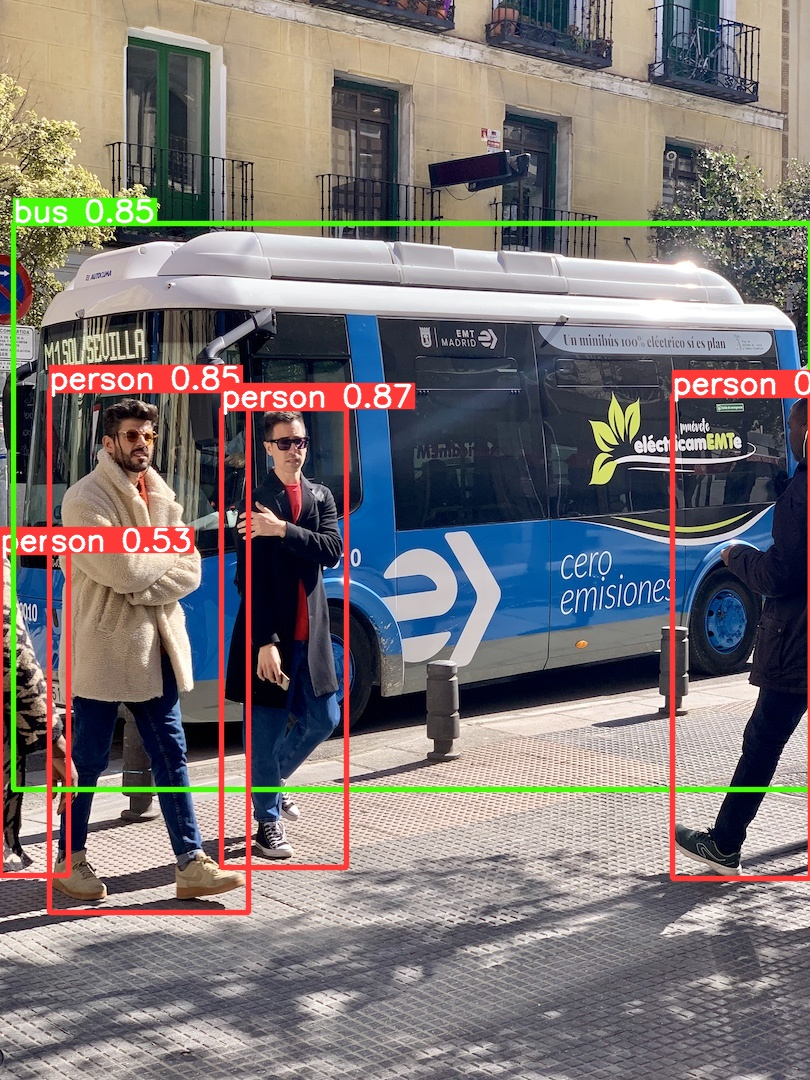

In [22]:
import utils
display = utils.notebook_init() # checks
display.Image(filename='runs/detect/exp/bus.jpg', width=600)

In [23]:
#c- Train the model here
# Use train.py  to train based on given criteria
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-243-g5e03f5f Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

In [32]:
#d- Test model
# Detect the images in the given folder exp/
!python detect.py --source "/content/drive/MyDrive/Colab Notebooks/Image_Processing/ASG3/testData"

detect: weights=yolov5s.pt, source=/content/drive/MyDrive/Colab Notebooks/Image_Processing/ASG3/testData, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-243-g5e03f5f Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/drive/MyDrive/Colab Notebooks/Image_Processing/ASG3/testData/Bike.jpg: 448x640 1 person, 1 bicycle, 8 cars, 2 trucks, 12.5ms
image 2/2 /content/drive/MyDrive/Colab Notebooks/Image_Processing/ASG3/testData/raykin_pre_annotation.png: 512x640 1 person, 1 dog, 1 surfboard, 1 mouse, 1 clock, 13.1ms
Speed: 0.5ms pre-

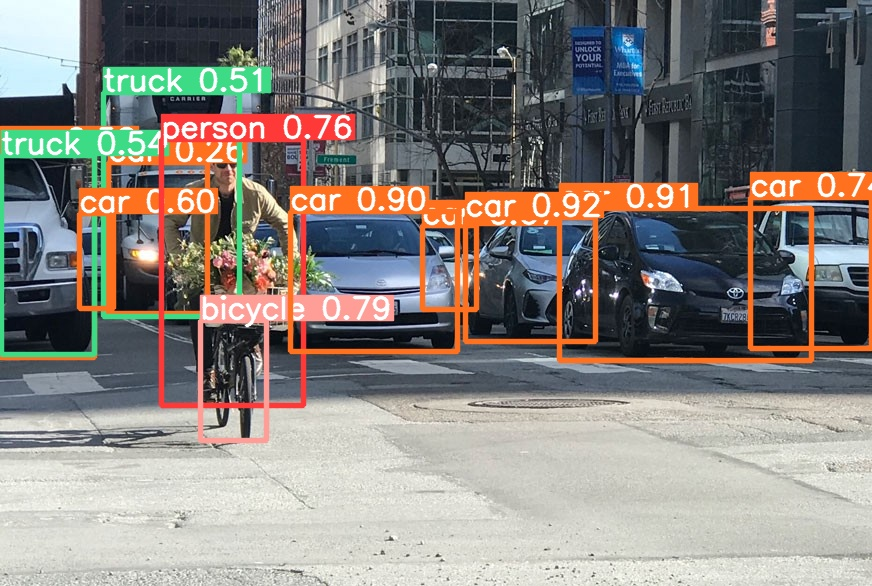

In [31]:
# e- See the result.
# Show the result and all the assigned objects here
display.Image(filename='runs/detect/exp3/Bike.jpg', width=600)

#### What is your understanding from this image? What is the meaning of these numbers all over the image?

This image shows a person with value assigned 0.76 on a bycicle with value assigned 0.90. Behind this person there are border boxes drawn around 8 cars and 2 trucks, with values ranging from 0.51 to 0.92.

We know that YOLOv5 has 3 loss functions it undergoes during training:
box_loss — bounding box regression loss (Mean Squared Error).


1.   obj_loss — the confidence of object presence is the objectness loss (Binary Cross Entropy).

2.   cls_loss — the classification loss (Cross Entropy).

3.   box_loss — bounding box regression loss (Mean Squared Error).

These values are the normalized regression values yielded by the model, representing the confidence of the prediction towards the given class within the bounding box. We can see that on the truck on the left with a value of 0.54, there is also an orange bounding box around the same object predicting it is a car, illustrating these values in how YOLO works.